In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_anage = pl.read_csv("../../data/anage.csv", ignore_errors=True)
df_earthq = (pl.read_csv("../../data/EarthquakesChile_2000-2024.csv")
             .with_columns(date = pl.col("Date").cast(pl.Date()))
             .with_columns(year = pl.col("date").dt.year(),
                           month = pl.col("date").dt.strftime("%B")#.month()
                           )
             )


Usando el dataset `anage`, compara la distribución de longevidad máxima (`Maximum longevity (yrs)`) entre animales salvajes y en cautiverio (`Specimen origin`) para la clase Mammalia. Genera un KDE plot con `fill=True` y transparencia.

Personaliza el color del eje inferior, del eje izquierdo, y de los ticks y tickslabels. ELimina el eje superior y el eje de la derecha. Alinea el título en el lado izquierdo y utiliza un grosor de 400. Mueve la leyenda afuera del grafico en la parte derecha de manera centrada. Añade un titulo a la leyenda.

Realiza una segunda visualización utilizando un tipo de línea punteada para los ejes. Además mueve la leyenda la derecha en la parte inferior (fuera del gráfico), centrada y en dos columnas. Además elimina el recuadro de la leyenda.

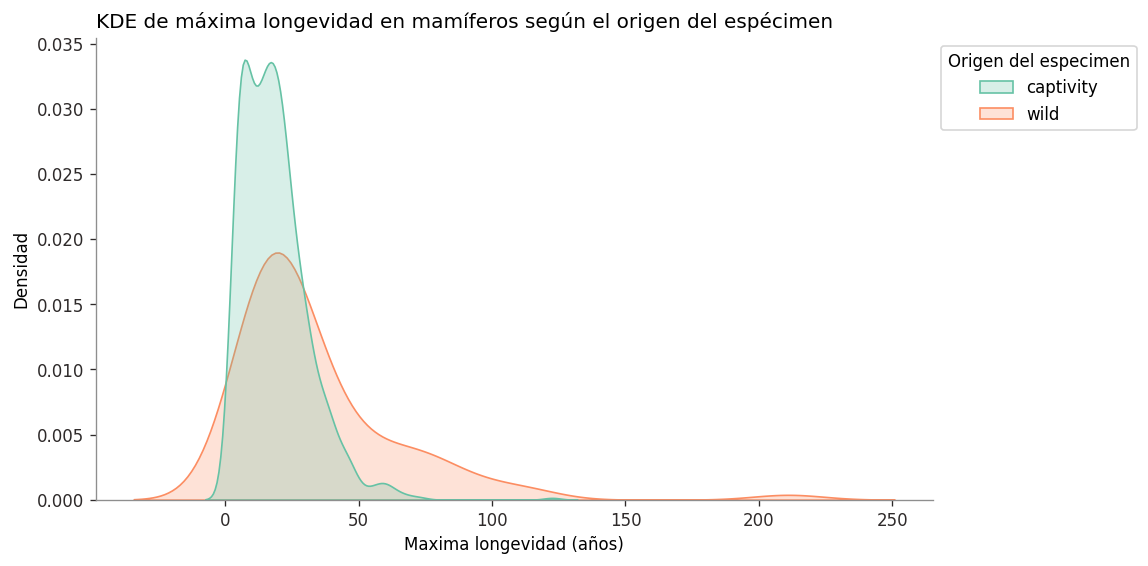

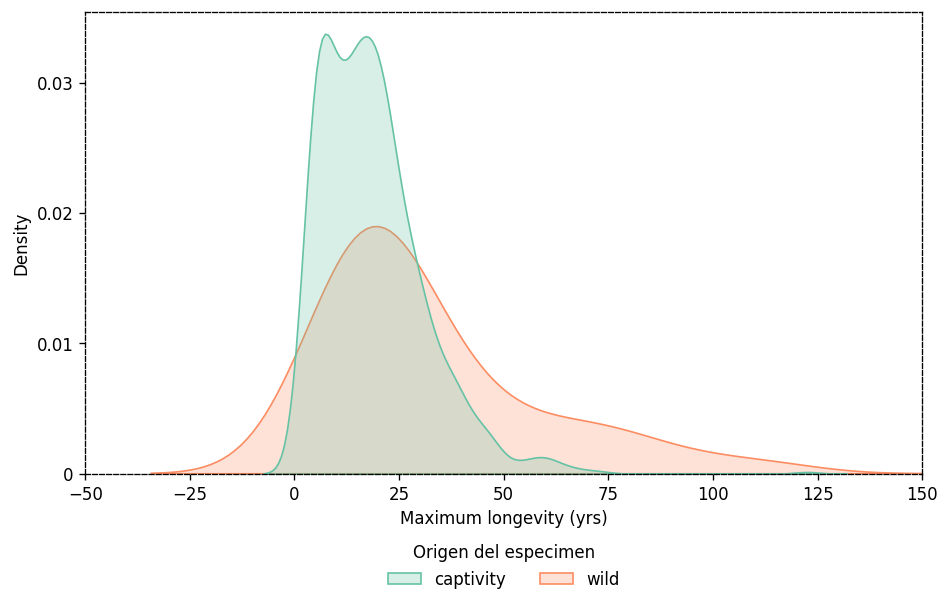

In [ ]:
df_anage_mammalia = df_anage.filter(
    pl.col("Class") == "Mammalia",
    pl.col("Specimen origin") != "unknown",
)

plt.figure(figsize=(9, 5), dpi=120)
ax = sns.kdeplot(
    data=df_anage_mammalia,
    x="Maximum longevity (yrs)",
    hue="Specimen origin",
    fill=True,
    common_norm=False,
    palette="Set2",
)

ax.set_title("KDE de máxima longevidad en mamíferos según el origen del espécimen", loc="left", weight="400")
ax.set_xlabel("Maxima longevidad (años)")
ax.set_ylabel("Densidad")
ax.spines["left"].set_color("#8e8e8e")
ax.spines["bottom"].set_color("#8e8e8e")
ax.tick_params(axis="x", colors="#2E2A2A")
ax.tick_params(axis="y", colors="#2E2A2A")

sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1),title="Origen del especimen")
# tambien puedes usar:
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),title="Origen del especimen")

sns.despine()
plt.show()

plt.figure(figsize=(9, 5), dpi=120)

ax = sns.kdeplot(
    data=df_anage_mammalia,
    x="Maximum longevity (yrs)",
    hue="Specimen origin",
    fill=True,
    common_norm=False,
    palette="Set2",
)
for spine in ["left","top","bottom","right"]:
    ax.spines[spine].set_linestyle("--")

ax.set_xlim(-50,150)
ax.set_yticks([0, 0.01, 0.02, 0.03],[0, 0.01, 0.02, 0.03])

sns.move_legend(ax, "center", bbox_to_anchor=(0.5, -0.2), ncol=2, title="Origen del especimen", frameon=False)


2. Usando el dataset `df_earthq`, genera un gráfico de dispersión (`scatterplot`) que muestre la relación entre la profundidad de los sismos (`Profoundity_Km`) y su magnitud (`Magnitude_Ml`) para el año 2009. Realiza las siguientes personalizaciones:
    - Asigna un color a los, un valor de transparencia y un tamaño a los puntos del gráfico.
	- Configura el límite del eje X para que vaya desde 0 hasta 250.
	- Añade un título que describa la visualización.
	- Personaliza los nombres de los ejes X e Y.
	- Identifica el sismo de mayor magnitud y:
	    - Anota cerca del punto el nombre de la región donde sucedió y añade una flecha entre el texto y el punto. Modifica el color del texto y al flecha.

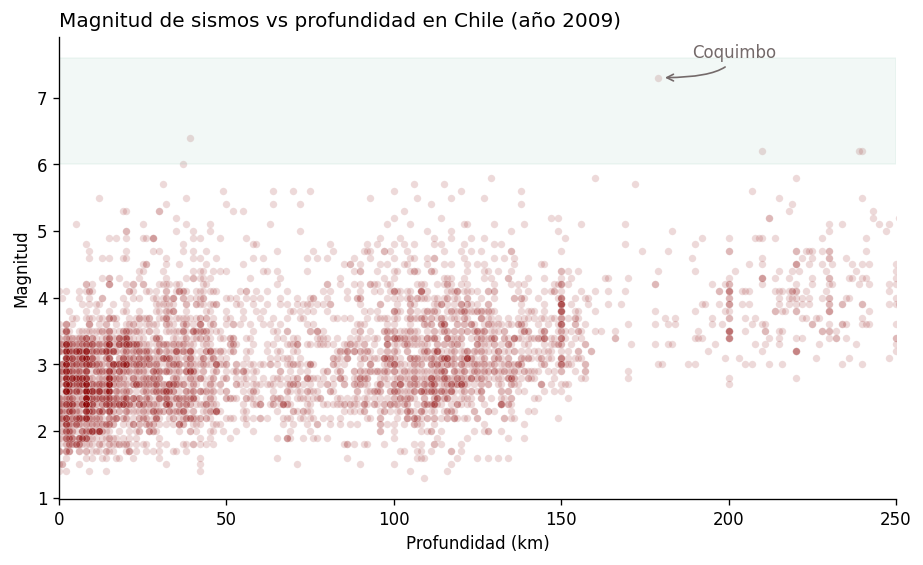

In [171]:
plt.figure(figsize=(9, 5), dpi=120)
df_earthquakes_2009 = (
    df_earthq.filter(
        pl.col("year") == 2009,
    )
)
ax = sns.scatterplot(
    data=df_earthquakes_2009,
    x="Profoundity_Km",
    y="Magnitude_Ml",
    color='darkred',
    alpha=0.15,
    s=20
)
ax.set_xlim(0,250)
ax.set_title("Magnitud de sismos vs profundidad en Chile (año 2009)", loc="left")
ax.set_xlabel("Profundidad (km)")
ax.set_ylabel("Magnitud")

max_magnitude = (df_earthq
                 .filter(pl.col("year") == 2009)
                 .sort("Magnitude_Ml", descending=True)
                 .head(1)
                 )
sns.despine()
ax.annotate(max_magnitude["Region"][0],
            xy=(max_magnitude["Profoundity_Km"][0]+1,max_magnitude["Magnitude_Ml"][0]),
            xytext=(max_magnitude["Profoundity_Km"][0]+ 10,max_magnitude["Magnitude_Ml"][0]+0.3),
            color="#746A6A",
            arrowprops=dict(
                arrowstyle="->",
                color="#746A6A",
                connectionstyle="angle3"

            ),
            
            )

ymin, ymax = ax.get_ylim()


ax.axhspan(
    6,ymax,
    color="#81c1ac",
    alpha=0.1,
    label="Zona destacada",
)
